In [1]:
import yaml
from src.features import augm, mol2graph
import numpy as np

config = yaml.safe_load(open("configs/test.yaml", mode="r"))
augmentation = True
computable_atoms = config["computable_atoms"]
chirality = config["chirality"]
stereochemistry = config["stereochemistry"]

smiles = np.array(["CCCC", "c1ccccc1CC", "CCC[C@@H](O)CC\C=C\C=C\C#CC#C\C=C\CO"])
y = np.array([100, 200, 300])


smiles, enum_card_train, y = augm.augment_data(
    smiles, y, augmentation
)
smiles

array(['CCCC', 'C(CC)C', 'C(C)CC', 'c1ccccc1CC', 'c1cccc(CC)c1',
       'c1ccc(CC)cc1', 'c1cc(CC)ccc1', 'c1c(CC)cccc1', 'c1(CC)ccccc1',
       'C(C)c1ccccc1', 'CCc1ccccc1',
       'OC/C=C/C#CC#C/C=C/C=C/CC[C@@H](CCC)O',
       'C(/C=C/C#CC#C/C=C/CO)=C\\CC[C@@H](CCC)O',
       'C(/C=C/C=C/C#CC#C/C=C/CO)C[C@@H](CCC)O',
       'O[C@@H](CC/C=C/C=C/C#CC#C/C=C/CO)CCC',
       'C([C@@H](O)CC/C=C/C=C/C#CC#C/C=C/CO)CC',
       'C(#CC#C/C=C/CO)/C=C/C=C/CC[C@@H](CCC)O',
       'C(\\C#CC#C/C=C/CO)=C/C=C/CC[C@@H](CCC)O',
       '[C@H](O)(CC/C=C/C=C/C#CC#C/C=C/CO)CCC',
       'C(/C=C/CO)#CC#C/C=C/C=C/CC[C@@H](CCC)O',
       'C(#C/C=C/CO)C#C/C=C/C=C/CC[C@@H](CCC)O'], dtype='<U38')

In [2]:
enum_card_train

[3, 8, 10]

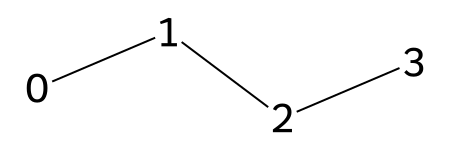

In [3]:
from rdkit import Chem

mol1 = Chem.MolFromSmiles(smiles[0])
for atom in mol1.GetAtoms():
    atom.SetProp("atomLabel", str(atom.GetIdx()))
mol1

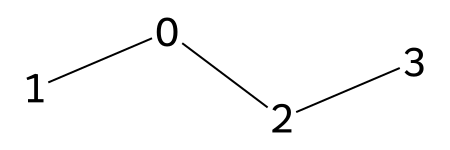

In [4]:
mol2 = Chem.MolFromSmiles(smiles[2])
for atom in mol2.GetAtoms():
    atom.SetProp("atomLabel", str(atom.GetIdx()))
mol2

In [5]:
bond = mol2.GetBondBetweenAtoms(0, 1)
bond.GetBondType()

rdkit.Chem.rdchem.BondType.SINGLE

In [6]:

graph = mol2graph.get_graph_vectors(smiles, y, computable_atoms, poly_flag=False)
graph
len(graph[0].x[0])

44

In [7]:
# from torch.utils.data import Dat
from torch_geometric.loader import DataLoader


for i in DataLoader(graph, batch_size=3):
    print(type(i))
    print(i)
    print(i.y)
    print(i.ptr)

<class 'torch_geometric.data.batch.DataBatch'>
DataBatch(x=[12, 44], edge_index=[2, 18], edge_attr=[18, 9], y=[3], batch=[12], ptr=[4])
tensor([100., 100., 100.])
tensor([ 0,  4,  8, 12])
<class 'torch_geometric.data.batch.DataBatch'>
DataBatch(x=[24, 44], edge_index=[2, 48], edge_attr=[48, 9], y=[3], batch=[24], ptr=[4])
tensor([200., 200., 200.])
tensor([ 0,  8, 16, 24])
<class 'torch_geometric.data.batch.DataBatch'>
DataBatch(x=[24, 44], edge_index=[2, 48], edge_attr=[48, 9], y=[3], batch=[24], ptr=[4])
tensor([200., 200., 200.])
tensor([ 0,  8, 16, 24])
<class 'torch_geometric.data.batch.DataBatch'>
DataBatch(x=[35, 44], edge_index=[2, 68], edge_attr=[68, 9], y=[3], batch=[35], ptr=[4])
tensor([200., 200., 300.])
tensor([ 0,  8, 16, 35])
<class 'torch_geometric.data.batch.DataBatch'>
DataBatch(x=[57, 44], edge_index=[2, 108], edge_attr=[108, 9], y=[3], batch=[57], ptr=[4])
tensor([300., 300., 300.])
tensor([ 0, 19, 38, 57])
<class 'torch_geometric.data.batch.DataBatch'>
DataBatch(x

In [8]:
graph[0]

Data(x=[4, 44], edge_index=[2, 6], edge_attr=[6, 9], y=[1])